# Human Activity Recognition

### Step 1: Download the dataset from link 




Download completed


### Step 2: Extract in the working directory


     |████████████████████████████████| 81kB 5.5MB/s 


### Step 3: Download Libraries


In [2]:
import tensorflow as tf
tf.__version__

'2.13.1'

In [51]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [52]:
path='C:/Users/MD Raffaul Islam/Downloads/dataset/'
files=[file for file in os.listdir(path) if file.endswith('.csv')]
files

['Participant_1.csv',
 'Participant_10.csv',
 'Participant_2.csv',
 'Participant_3.csv',
 'Participant_4.csv',
 'Participant_5.csv',
 'Participant_6.csv',
 'Participant_7.csv',
 'Participant_8.csv',
 'Participant_9.csv']

In [53]:
# load a file into memory
df=pd.read_csv(path+files[0],header=1)
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,...,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,...,-5.3574,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,...,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,...,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972,...,-3.5908,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724,...,-1.9450,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking


In [13]:
df['Unnamed: 69'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

## Visualize the difference in change in values w.r.t activity

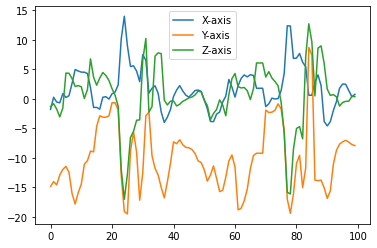

In [14]:
# change in values while walking

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="walking"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="walking"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="walking"][:100], label='Z-axis')
plt.legend()

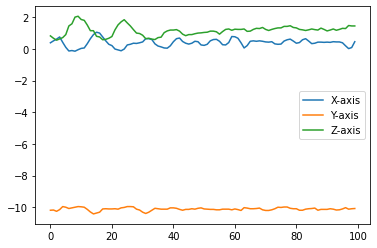

In [15]:
# change in values while standing

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="standing"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="standing"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="standing"][:100], label='Z-axis')
plt.legend()

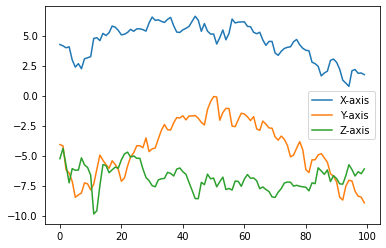

In [16]:
# change in values while biking

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="biking"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="biking"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="biking"][:100], label='Z-axis')
plt.legend()

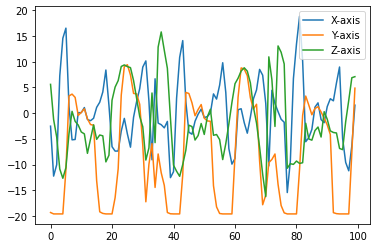

In [17]:
# change in values while jogging

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="jogging"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="jogging"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="jogging"][:100], label='Z-axis')
plt.legend()

## Load and concatenate all files into one dataframe

In [18]:
df=pd.DataFrame()

for file in files:
    df_temp=pd.read_csv(path+file,header=1)
    df=pd.concat([df,df_temp], sort=False)
df

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,...,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,-1.81150,-14.8730,-1.34840,-1.269100,-5.105700,-0.664450,-0.532060,-3.18690,0.239760,...,-5.35740,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.0700,-0.84446,0.701470,-4.296900,-0.171990,-0.252290,-1.79660,0.407450,...,-4.53520,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.6280,-1.75700,-0.217600,-4.853100,-1.056500,-1.049200,0.29138,0.292300,...,-4.04080,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.9390,-3.09180,-0.322730,-3.178600,-2.219700,-2.372000,1.00820,0.349720,...,-3.59080,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.0000,-1.56630,1.137400,-2.239000,-0.654760,-2.790100,0.65485,0.227240,...,-1.94500,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,1.390000e+12,-3.11910,-9.0167,-1.51190,2.289100,-0.836530,-1.422500,0.430050,-0.50946,0.111790,...,0.54756,2.91870,-1.543100,-0.74678,0.31857,0.103540,27.06,27.30,-76.92,downstairs
62996,1.390000e+12,-4.56280,-7.5321,0.70826,0.843960,0.648940,0.615980,0.197920,-0.67959,-0.092546,...,0.65620,2.68710,-1.546200,-0.35308,0.35125,0.221440,26.94,27.30,-76.80,downstairs
62997,1.390000e+12,-5.40730,-7.8045,0.87170,-0.022973,0.389340,0.668480,0.193340,-0.65088,-0.208000,...,1.54690,1.68460,-1.771800,-0.28711,0.19487,0.210750,26.58,27.12,-77.04,downstairs
62998,1.390000e+12,-6.04740,-8.1177,0.25879,-0.695410,0.094103,-0.044593,0.188760,-0.50824,-0.164630,...,1.14830,0.69598,-1.924200,-0.32742,-0.16066,0.114230,26.46,27.18,-76.92,downstairs


In [13]:
for i in df.columns:
    print(i)

time_stamp
Ax
Ay
Az
Lx
Ly
Lz
Gx
Gy
Gz
Mx
My
Mz
Unnamed: 13
time_stamp.1
Ax.1
Ay.1
Az.1
Lx.1
Ly.1
Lz.1
Gx.1
Gy.1
Gz.1
Mx.1
My.1
Mz.1
Unnamed: 27
time_stamp.2
Ax.2
Ay.2
Az.2
Lx.2
Ly.2
Lz.2
Gx.2
Gy.2
Gz.2
Mx.2
My.2
Mz.2
Unnamed: 41
time_stamp.3
Ax.3
Ay.3
Az.3
Lx.3
Ly.3
Lz.3
Gx.3
Gy.3
Gz.3
Mx.3
My.3
Mz.3
Unnamed: 55
time_stamp.4
Ax.4
Ay.4
Az.4
Lx.4
Ly.4
Lz.4
Gx.4
Gy.4
Gz.4
Mx.4
My.4
Mz.4
Unnamed: 69


In [22]:
# split out left and right pocket data

left_pocket = df[df.columns[1:10]]
left_pocket

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.8730,-1.34840,-1.269100,-5.105700,-0.664450,-0.532060,-3.18690,0.239760
1,0.24517,-14.0700,-0.84446,0.701470,-4.296900,-0.171990,-0.252290,-1.79660,0.407450
2,-0.57205,-14.6280,-1.75700,-0.217600,-4.853100,-1.056500,-1.049200,0.29138,0.292300
3,-0.69464,-12.9390,-3.09180,-0.322730,-3.178600,-2.219700,-2.372000,1.00820,0.349720
4,0.87170,-12.0000,-1.56630,1.137400,-2.239000,-0.654760,-2.790100,0.65485,0.227240
...,...,...,...,...,...,...,...,...,...
62995,-3.11910,-9.0167,-1.51190,2.289100,-0.836530,-1.422500,0.430050,-0.50946,0.111790
62996,-4.56280,-7.5321,0.70826,0.843960,0.648940,0.615980,0.197920,-0.67959,-0.092546
62997,-5.40730,-7.8045,0.87170,-0.022973,0.389340,0.668480,0.193340,-0.65088,-0.208000
62998,-6.04740,-8.1177,0.25879,-0.695410,0.094103,-0.044593,0.188760,-0.50824,-0.164630


In [23]:
right_pocket = df[df.columns[15:24]]
right_pocket.columns=left_pocket.columns
right_pocket

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.19860,-13.8520,3.786500,-1.76980,-4.06250,3.89850,-3.62550,1.07390,0.136220
1,-2.38360,-16.5900,2.996500,-2.70250,-6.78900,2.86820,-3.48990,0.39034,0.400730
2,-4.63090,-16.6030,2.070300,-4.34550,-6.80810,1.68890,-3.38510,-1.99200,1.122800
3,-4.78070,-16.4530,1.157700,-4.19540,-6.67310,0.74084,-3.10170,-3.04390,0.791380
4,-0.92618,-12.1900,-1.062400,-0.18116,-2.41440,-1.28500,-2.75870,-4.46020,0.693640
...,...,...,...,...,...,...,...,...,...
62995,3.86820,-9.9020,0.354130,3.55870,-0.18493,-0.93169,-0.20617,0.28253,0.230910
62996,3.94990,-9.5206,0.054481,3.63060,0.20627,-1.15210,-0.25137,0.32223,0.107210
62997,3.43230,-9.4798,-0.313270,3.09120,0.24997,-1.49070,-0.13531,0.25351,-0.073609
62998,2.43800,-9.5615,-0.858080,2.04180,0.17223,-1.98430,-0.16768,0.29963,-0.204330


In [24]:
# concatenate left and right split in one data frame

train_df=pd.concat([left_pocket,right_pocket],sort=False)
train_df

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.8730,-1.348400,-1.26910,-5.10570,-0.66445,-0.53206,-3.18690,0.239760
1,0.24517,-14.0700,-0.844460,0.70147,-4.29690,-0.17199,-0.25229,-1.79660,0.407450
2,-0.57205,-14.6280,-1.757000,-0.21760,-4.85310,-1.05650,-1.04920,0.29138,0.292300
3,-0.69464,-12.9390,-3.091800,-0.32273,-3.17860,-2.21970,-2.37200,1.00820,0.349720
4,0.87170,-12.0000,-1.566300,1.13740,-2.23900,-0.65476,-2.79010,0.65485,0.227240
...,...,...,...,...,...,...,...,...,...
62995,3.86820,-9.9020,0.354130,3.55870,-0.18493,-0.93169,-0.20617,0.28253,0.230910
62996,3.94990,-9.5206,0.054481,3.63060,0.20627,-1.15210,-0.25137,0.32223,0.107210
62997,3.43230,-9.4798,-0.313270,3.09120,0.24997,-1.49070,-0.13531,0.25351,-0.073609
62998,2.43800,-9.5615,-0.858080,2.04180,0.17223,-1.98430,-0.16768,0.29963,-0.204330


In [26]:
# restore labels in dataframe
labels=pd.concat([df['Unnamed: 69'],df['Unnamed: 69']],axis=0, sort=False)
labels.columns=['Activity']
train_df['Activity']=labels
train_df

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,-1.81150,-14.8730,-1.348400,-1.26910,-5.10570,-0.66445,-0.53206,-3.18690,0.239760,walking
1,0.24517,-14.0700,-0.844460,0.70147,-4.29690,-0.17199,-0.25229,-1.79660,0.407450,walking
2,-0.57205,-14.6280,-1.757000,-0.21760,-4.85310,-1.05650,-1.04920,0.29138,0.292300,walking
3,-0.69464,-12.9390,-3.091800,-0.32273,-3.17860,-2.21970,-2.37200,1.00820,0.349720,walking
4,0.87170,-12.0000,-1.566300,1.13740,-2.23900,-0.65476,-2.79010,0.65485,0.227240,walking
...,...,...,...,...,...,...,...,...,...,...
62995,3.86820,-9.9020,0.354130,3.55870,-0.18493,-0.93169,-0.20617,0.28253,0.230910,downstairs
62996,3.94990,-9.5206,0.054481,3.63060,0.20627,-1.15210,-0.25137,0.32223,0.107210,downstairs
62997,3.43230,-9.4798,-0.313270,3.09120,0.24997,-1.49070,-0.13531,0.25351,-0.073609,downstairs
62998,2.43800,-9.5615,-0.858080,2.04180,0.17223,-1.98430,-0.16768,0.29963,-0.204330,downstairs


In [27]:
#check for unique labels
train_df.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs', 'upsatirs'], dtype=object)

In [31]:
train_df.Activity.loc[(train_df.Activity == 'upsatirs')] = 'upstairs'
train_df.Activity.unique()

C:\Users\MD Raffaul Islam\AppData\Local\Temp\ipykernel_23908\2798514482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Activity.loc[(train_df.Activity == 'upsatirs')] = 'upstairs'


array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

# Preprocessing 


## Split the data and labels

In [32]:
X_train = train_df[train_df.columns[:9]]
y_train = train_df[train_df.columns[9:10]]

In [33]:
X_train 

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.8730,-1.348400,-1.26910,-5.10570,-0.66445,-0.53206,-3.18690,0.239760
1,0.24517,-14.0700,-0.844460,0.70147,-4.29690,-0.17199,-0.25229,-1.79660,0.407450
2,-0.57205,-14.6280,-1.757000,-0.21760,-4.85310,-1.05650,-1.04920,0.29138,0.292300
3,-0.69464,-12.9390,-3.091800,-0.32273,-3.17860,-2.21970,-2.37200,1.00820,0.349720
4,0.87170,-12.0000,-1.566300,1.13740,-2.23900,-0.65476,-2.79010,0.65485,0.227240
...,...,...,...,...,...,...,...,...,...
62995,3.86820,-9.9020,0.354130,3.55870,-0.18493,-0.93169,-0.20617,0.28253,0.230910
62996,3.94990,-9.5206,0.054481,3.63060,0.20627,-1.15210,-0.25137,0.32223,0.107210
62997,3.43230,-9.4798,-0.313270,3.09120,0.24997,-1.49070,-0.13531,0.25351,-0.073609
62998,2.43800,-9.5615,-0.858080,2.04180,0.17223,-1.98430,-0.16768,0.29963,-0.204330


In [34]:
y_train

,Activity
0,walking
1,walking
2,walking
3,walking
4,walking
...,...
62995,downstairs
62996,downstairs
62997,downstairs
62998,downstairs


In [35]:
y_train.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

## Encode labels into number

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train[:10]

C:\Users\MD Raffaul Islam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

## Split training data into training and validation data

In [43]:
def train_test_split(X, y, split_size=0.8):
    split= int(len(X) * split_size)
    train_x = X[:split]
    train_y = y[:split]
    test_x = X[split:]
    test_y = y[split: ]
    return train_x, test_x, train_y, test_y

X_train,X_test,y_train, y_test =train_test_split(X_train, y_train)

print("X_train shape ", X_train.shape)
print("Y train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (806400, 9)
Y train shape  (806400,)
X_test shape  (201600, 9)
y_test shape  (201600,)


## Convert dataset into time series sequence

In [44]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_time_steps = 100
n_features = 9

train_gen = TimeseriesGenerator(X_train.to_numpy(), y_train, length=n_time_steps, batch_size=1024)
test_gen = TimeseriesGenerator(X_test.to_numpy(), y_test, length=n_time_steps, batch_size=1024)

## Create and compile LSTM model

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, LSTM
from keras.regularizers import l2
from keras.optimizers import Adam

In [46]:
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (n_time_steps, n_features),
              kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='lstm_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210695 (823.03 KB)
Trainable params: 210695 (823.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [48]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

## Start training

In [49]:
history = model.fit_generator(train_gen, epochs=5, validation_data=test_gen, callbacks=callbacks)

Epoch 1/5


C:\Users\MD Raffaul Islam\AppData\Local\Temp\ipykernel_23908\1771660870.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=5, validation_data=test_gen, callbacks=callbacks)


788/788 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8485
Epoch 1: val_loss improved from inf to 0.14015, saving model to model.h5
788/788 [==============================] - 161s 202ms/step - loss: 0.4463 - accuracy: 0.8485 - val_loss: 0.1401 - val_accuracy: 0.9694
Epoch 2/5


C:\Users\MD Raffaul Islam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


788/788 [==============================] - ETA: 0s - loss: 0.1033 - accuracy: 0.9734
Epoch 2: val_loss improved from 0.14015 to 0.08601, saving model to model.h5
788/788 [==============================] - 164s 208ms/step - loss: 0.1033 - accuracy: 0.9734 - val_loss: 0.0860 - val_accuracy: 0.9751
Epoch 3/5
788/788 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9882
Epoch 3: val_loss improved from 0.08601 to 0.05766, saving model to model.h5
788/788 [==============================] - 158s 200ms/step - loss: 0.0478 - accuracy: 0.9882 - val_loss: 0.0577 - val_accuracy: 0.9827
Epoch 4/5
788/788 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9780
Epoch 4: val_loss did not improve from 0.05766
788/788 [==============================] - 175s 223ms/step - loss: 0.0888 - accuracy: 0.9780 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 5/5
788/788 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9921
Epoch 5: val_loss did no

In [50]:
# stopping training here

# loading the best saved model 

from keras.models import load_model
model=load_model('model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210695 (823.03 KB)
Trainable params: 210695 (823.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Exporting the model

In [35]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np
#path of the directory where you want to save your model
frozen_out_path = ''
# name of the .pb file
frozen_graph_filename = "frozen_graph"
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)
# Save frozen graph to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
# Save its text representation
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)


------------------------------------------------------------
Frozen model layers: 
x
unused_control_flow_input
sequential/lstm_1/Identity
Func/sequential/lstm_1/PartitionedCall/input/_3
sequential/lstm_1/PartitionedCall/while/enter/_21
unused_control_flow_input_1
Func/sequential/lstm_1/PartitionedCall/while/body/_12/output/_104
sequential/lstm_1/PartitionedCall/while/next_iteration/_68
sequential/lstm_1/PartitionedCall/while/merge/_32
unused_control_flow_input_2
sequential/lstm_1/PartitionedCall/while/Func/sequential/lstm_1/PartitionedCall/input/_3_switch/_44
Func/sequential/lstm_1/PartitionedCall/while/body/_12/input/_93
sequential/lstm_1/Read/ReadVariableOp/resource
sequential/lstm_1/Read/ReadVariableOp
Func/sequential/lstm_1/PartitionedCall/while/body/_12/output_control_node/_107
Func/sequential/lstm_1/PartitionedCall/input/_0
sequential/lstm_1/PartitionedCall/transpose/perm
sequential/lstm_1/PartitionedCall/transpose
sequential/lstm_1/PartitionedCall/TensorArrayUnstack/TensorListFr

'frozen_graph.pbtxt'

In [ ]:
# Deployment of this model in next video 
